Part 1: Genism

In this lab, I'll be working with "Sophie's World," a philosophical book that explores the history of philosophy. This book holds a special place in my heart. It's one of my all-time favorite books. I initially read it in French as a teenager and have now decided to revisit it, this time in English. I'm curious to explore some word vector analysis on its text.

In [1]:
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

from gensim.models import Word2Vec

from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# read a file you have stored locally
# I added the Hunger Games for simplicity
file = open("Sophies world.txt", 'r', encoding='utf-8').read()

# first, remove unwanted new line and tab characters from the text
for char in ["\n", "\r", "\d", "\t"]:
   file = file.replace(char, " ")

# check
print(file[:100])

Sophie’s World   Jostien Gaarder     Reviews:  More praise for the international bestseller that has


In [4]:
# this is simplified for demonstration
def sample_clean_text(text: str):
    # step 1: tokenize the text into sentences
    sentences = nltk.sent_tokenize(text)

    # step 2: tokenize each sentence into words
    tokenized_sentences = [nltk.word_tokenize(sent) for sent in sentences]

    # step 3: convert each word to lowercase
    tokenized_text = [[word.lower() for word in sent] for sent in tokenized_sentences]
    
    # return your tokens
    return tokenized_text

# call the function
tokens = sample_clean_text(text = file)

# check
print(tokens[:10])

[['sophie', '’', 's', 'world', 'jostien', 'gaarder', 'reviews', ':', 'more', 'praise', 'for', 'the', 'international', 'bestseller', 'that', 'has', 'become', '“', 'europe', '’', 's', 'oddball', 'literary', 'sensation', 'of', 'the', 'decade', '”', '(', 'new', 'york', 'newsday', ')', '“', 'a', 'page-turner.', '”', '—entertainment', 'weekly', '“', 'first', ',', 'think', 'of', 'a', 'beginner', '’', 's', 'guide', 'to', 'philosophy', ',', 'written', 'by', 'a', 'schoolteacher', '...', 'next', ',', 'imagine', 'a', 'fantasy', 'novel—', 'something', 'like', 'a', 'modern-day', 'version', 'of', 'through', 'the', 'looking', 'glass', '.'], ['meld', 'these', 'disparate', 'genres', ',', 'and', 'what', 'do', 'you', 'get', '?'], ['well', ',', 'what', 'you', 'get', 'is', 'an', 'improbable', 'international', 'bestseller', '...', 'a', 'runaway', 'hit', '...', '[', 'a', ']', 'tour', 'deforce.', '”', '—time', '“', 'compelling.', '”', '—los', 'angeles', 'times', '“', 'its', 'depth', 'of', 'learning', ',', 'its

In [5]:
model = Word2Vec(tokens,vector_size=100)

In [6]:
model.wv.key_to_index

{'the': 0,
 '.': 1,
 ',': 2,
 'of': 3,
 '“': 4,
 '”': 5,
 'to': 6,
 'a': 7,
 'and': 8,
 '’': 9,
 'that': 10,
 'in': 11,
 'was': 12,
 'it': 13,
 'is': 14,
 's': 15,
 'you': 16,
 'he': 17,
 'she': 18,
 '?': 19,
 'we': 20,
 'sophie': 21,
 'i': 22,
 'had': 23,
 'but': 24,
 'as': 25,
 'not': 26,
 'on': 27,
 '%': 28,
 'her': 29,
 'for': 30,
 'have': 31,
 'be': 32,
 'with': 33,
 ':': 34,
 'are': 35,
 'what': 36,
 'from': 37,
 'all': 38,
 'this': 39,
 'they': 40,
 'can': 41,
 'there': 42,
 'at': 43,
 't': 44,
 'world': 45,
 'or': 46,
 'one': 47,
 'so': 48,
 '‘': 49,
 'his': 50,
 'were': 51,
 'an': 52,
 'about': 53,
 'by': 54,
 'could': 55,
 'when': 56,
 '...': 57,
 '!': 58,
 'said': 59,
 'if': 60,
 'up': 61,
 'no': 62,
 'who': 63,
 'only': 64,
 'would': 65,
 'hilde': 66,
 'also': 67,
 'more': 68,
 'into': 69,
 'out': 70,
 'time': 71,
 'like': 72,
 'just': 73,
 'now': 74,
 'which': 75,
 'how': 76,
 'alberto': 77,
 'do': 78,
 'something': 79,
 'way': 80,
 'god': 81,
 'our': 82,
 'will': 83,
 'be

In [7]:
model.wv.get_vector("god", norm=True)

array([-1.10832490e-01,  1.07907869e-01,  6.76515028e-02, -8.42153188e-03,
       -1.46705853e-02, -1.98020935e-01, -5.29629178e-03,  1.87211528e-01,
       -9.11062434e-02,  1.59565154e-02, -2.70431135e-02,  2.20182780e-02,
        8.96735415e-02, -5.35269715e-02,  1.61297187e-01, -1.60733685e-01,
        6.92354515e-02, -6.34761006e-02, -5.37809543e-02, -1.40014648e-01,
        2.79959235e-02,  1.00439586e-01,  8.73389021e-02, -1.60917535e-01,
       -1.22661576e-01,  6.77813366e-02,  1.83937866e-02, -1.39432494e-02,
       -1.48812115e-01,  5.91720082e-02, -5.22003993e-02, -8.74998793e-02,
        2.66918659e-01, -2.27830652e-02,  1.80654302e-02,  8.48276094e-02,
       -2.35970672e-02, -8.58315676e-02, -9.36970115e-02, -1.66190565e-01,
       -1.89899672e-02, -1.65054470e-01, -1.19657675e-02,  6.04243800e-02,
        2.25217603e-02,  4.36550453e-02, -8.79996940e-02,  9.23628807e-02,
       -1.95454294e-03, -8.21578410e-03,  4.48296107e-02,  3.30454856e-02,
        3.74357328e-02, -

In [8]:
model.wv.most_similar('god')

[('man', 0.9694548845291138),
 ('nature', 0.9589041471481323),
 ('one', 0.9390202760696411),
 ('or', 0.9370630383491516),
 ('soul', 0.9334103465080261),
 ('reason', 0.9306271076202393),
 ('means', 0.9290663003921509),
 ('this', 0.9225256443023682),
 ('plato', 0.9151613712310791),
 ('source', 0.91392982006073)]

In [9]:
model.wv.most_similar('love')

[('berkeley', 0.996059775352478),
 ('kierkegaard', 0.9946309924125671),
 ('contain', 0.9943925142288208),
 ('feeling', 0.9943427443504333),
 ('anyway', 0.9933089017868042),
 ('personal', 0.9928522109985352),
 ('according', 0.9927955269813538),
 ('impossible', 0.992592453956604),
 ('strange', 0.9923762679100037),
 ('fair', 0.9920158982276917)]

In [10]:
#model.wv.similarity('mind', 'idea')

In [11]:
#model.wv.similarity('world', 'question')

In [12]:
model.wv.similarity('philosopher', 'question')

0.97077036

In [13]:
import warnings

# Ignore the specific t-SNE warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.manifold._t_sne")

def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)
warnings.filterwarnings("default")

In [14]:
def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

C:\Users\Dani\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



Visualizing a Smaller Sample of 300 Words

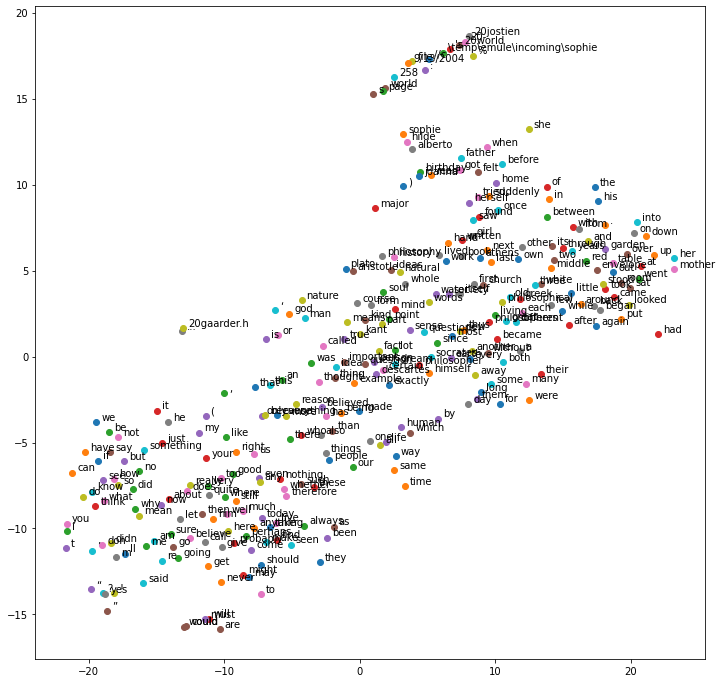

In [15]:
import warnings

# Ignore the warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.manifold._t_sne")

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def reduce_dimensions(model, num_words_to_display=100):
    # Extract the words and their vectors
    words = list(model.wv.index_to_key)
    vectors = [model.wv[word] for word in words]

    # Reduce dimensions using t-SNE
    tsne = TSNE(n_components=2, random_state=0)
    vectors_2D = tsne.fit_transform(vectors[:num_words_to_display])

    return vectors_2D, words

# Define the number of words you want to display
num_words_to_display = 300

# Replace 'model' with your loaded word vector model
vectors_2D, words = reduce_dimensions(model, num_words_to_display)

# Plot the word vectors
plt.figure(figsize=(12, 12))
for i, label in enumerate(words[:num_words_to_display]):
    x, y = vectors_2D[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points')

plt.show()
warnings.filterwarnings("default")

In the visualizations, we notice that some words stick together. For instance, words like "god," "spirit," and "angel" are huddled, hinting at something spiritual. Then, names like "Alberto," "Hilde," and "Sophie" are bunched up, pointing to key characters. Words like "philosopher" and "question" are cozy, showing a connection between deep thinking and inquiry. Also, words like "mother," "father," and "home" gather, suggesting a family connection. 

Part 2: GloVe

In [16]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [17]:
embeddings_dict = {}

In [18]:
with open("glove.6B.100d.txt", 'r', encoding="utf-8") as f:
  for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [19]:
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

In [20]:
lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding)

<function __main__.<lambda>(word)>

In [21]:
find_closest_embeddings(embeddings_dict["philosopher"])

['philosopher',
 'mathematician',
 'theologian',
 'thinker',
 'philosophers',
 'scholar',
 'logician',
 'historian',
 'sociologist',
 'poet',
 'linguist',
 'theorist',
 'orientalist',
 'geographer',
 'satirist',
 'novelist',
 'author',
 'anthropologist',
 'polymath',
 'idealist',
 'philologist',
 'musicologist',
 'thinkers',
 'dramatist',
 'naturalist',
 'nietzsche',
 'jurist',
 'realist',
 'existentialist',
 'psychoanalyst',
 'essayist',
 'humorist',
 'classicist',
 'archaeologist',
 'egyptologist',
 'astronomer',
 'chemist',
 'educator',
 'ethnologist',
 'sinologist',
 'disciple',
 'grammarian',
 'epictetus',
 'clergyman',
 'modernist',
 'biographer',
 'humanist',
 'wittgenstein',
 'painter',
 'archeologist',
 'physicist',
 'ethnographer',
 'storyteller',
 'educationist',
 'philosophy',
 'enlightenment',
 'sculptor',
 'medievalist',
 'metaphysician',
 'derrida',
 'kierkegaard',
 'scientist',
 'heraclitus',
 'voltaire',
 'rousseau',
 'geologist',
 'indologist',
 'immanuel',
 'chronicl

In [22]:
find_closest_embeddings(embeddings_dict["philosopher"])[:5] 

                                    

['philosopher', 'mathematician', 'theologian', 'thinker', 'philosophers']

In [23]:
print(find_closest_embeddings(embeddings_dict["love"])[:20])

['love', 'passion', 'dream', 'wonder', 'mind', 'true', 'life', 'dreams', 'always', 'loves', 'kind', 'friends', 'remember', 'loved', 'happy', 'forget', 'fun', 'wish', 'crazy', 'me']


In [24]:
print(find_closest_embeddings(embeddings_dict["love"] + embeddings_dict["life"])[:20])

['love', 'life', 'my', 'her', 'she', 'you', '``', 'good', 'mother', 'i', 'like', 'man', 'me', 'mind', 'kind', 'lives', 'story', 'what', 'things', 'something']


In [25]:
print(find_closest_embeddings(embeddings_dict["love"] - embeddings_dict["hate"] + embeddings_dict["life"])[:20])

['life', 'love', 'her', 'mother', 'she', 'father', 'man', 'great', 'dream', 'beauty', 'romantic', 'dreams', 'character', 'grace', 'story', 'lives', 'couple', 'his', 'journey', 'lover']


I appreciate how the code above returns words like 'mother' and 'father' as top results. This outcome is logically sound, as it aligns with the transformed context generated by subtracting 'hate' and adding 'life' to the word 'love' in the word embeddings.

In [26]:
print(find_closest_embeddings(embeddings_dict["human"] + embeddings_dict["peace"])[:20])

['peace', 'human', 'democracy', 'rights', 'conflict', 'efforts', 'progress', 'reconciliation', 'process', 'unity', 'cooperation', 'our', 'dialogue', 'freedom', 'organization', 'hope', 'political', 'nations', 'peaceful', 'talks']


In [27]:
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
X = np.asarray(vectors)

In [28]:
import warnings
# Ignore the warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.manifold._t_sne")

tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(X[:1000])
warnings.filterwarnings("default")

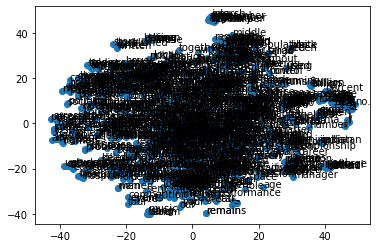

In [29]:
import warnings
# Ignore the warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.manifold._t_sne")
tsne = TSNE(n_components=2, random_state=0)
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
Y = tsne.fit_transform(vectors[:1000])
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()
warnings.filterwarnings("default")

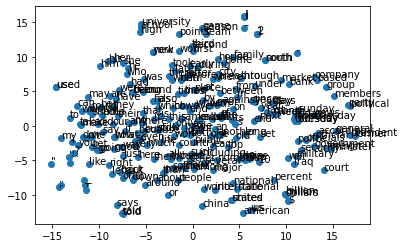

In [30]:
import warnings
# Ignore the warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.manifold._t_sne")

tsne = TSNE(n_components=2, random_state=0, perplexity=30, learning_rate=200.0)
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
Y = tsne.fit_transform(vectors[:250])
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()
warnings.filterwarnings("default")

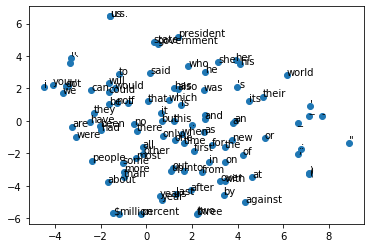

In [31]:
import warnings
# Ignore the warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.manifold._t_sne")

tsne = TSNE(n_components=2, random_state=0, perplexity=30, learning_rate=200.0)
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
Y = tsne.fit_transform(vectors[:100])
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()
warnings.filterwarnings("default")

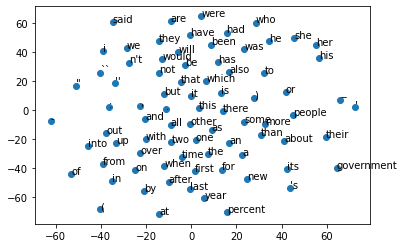

In [32]:
import warnings
# Ignore the warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.manifold._t_sne")

tsne = TSNE(n_components=2, random_state=0, perplexity=30, learning_rate=200.0)
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
Y = tsne.fit_transform(vectors[:80])
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()
warnings.filterwarnings("default")

When I first looked for words most similar to "love" in the book "Sophie's World" using the Gensim model, the results were a bit surprising. It gave words like "moon," "contain," "marx," and "eggs," which don't seem immediately connected to "love."

In contrast, when I used the GloVe model to search for "love," the results were much more intuitive. It provided words like "passion," "dream," "true," "life," and "friends," which are words that we naturally associate with the concept of "love."  